# 실습1. 1차원 클러스터링 예제

## 필요한 라이브러리 준비

In [28]:
from __future__ import print_function
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from pandas import DataFrame
from scipy.stats import entropy
from math import log, e
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import math
import timeit

## 예제용 데이터 준비

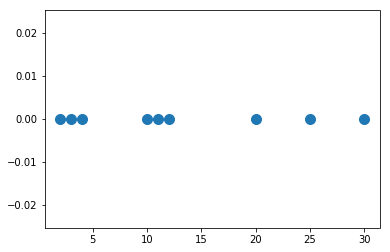

In [29]:
X = np.array([[2, 0], [3, 0], [4, 0], [10, 0], [11, 0], [12, 0],
              [20, 0], [25, 0], [30, 0]])
plt.scatter(X[:, 0], X[:, 1], s=100)
plt.show()

## K-means 클러스터링 실습

### K-means 1회차

In [30]:
# k-means 1회차
model1 = KMeans(n_clusters=2, init=np.array([[3,0],[4,0]]), n_init=1,
               max_iter=1, random_state=1).fit(X)
c0, c1 = model1.cluster_centers_
c0, c1

(array([2.5, 0. ]), array([16.,  0.]))

In [31]:
model1.score(X)

-372.75

In [32]:
model1.labels_

array([0, 0, 0, 1, 1, 1, 1, 1, 1], dtype=int32)

In [7]:
def kmeans_df(model, c0, c1):
    df = pd.DataFrame(np.hstack([X,
                                 np.linalg.norm(X - c0, axis=1)[:, np.newaxis],
                                 np.linalg.norm(X - c1, axis=1)[:, np.newaxis],
                                 model.labels_[:, np.newaxis]]),
                      columns=["x0", "x1", "d0", "d1", "c"])
    return df

In [8]:
kmeans_df(model1, c0, c1)

,x0,x1,d0,d1,c
0,2.0,0.0,0.5,14.0,0.0
1,3.0,0.0,0.5,13.0,0.0
2,4.0,0.0,1.5,12.0,0.0
3,10.0,0.0,7.5,6.0,1.0
4,11.0,0.0,8.5,5.0,1.0
5,12.0,0.0,9.5,4.0,1.0
6,20.0,0.0,17.5,4.0,1.0
7,25.0,0.0,22.5,9.0,1.0
8,30.0,0.0,27.5,14.0,1.0


In [37]:
X[model1.labels_ == 0]

array([[2, 0],
       [3, 0],
       [4, 0]])

In [34]:
X[model1.labels_ == 0, 0]

array([2, 3, 4])

In [35]:
X[model1.labels_ == 0, 1]

array([0, 0, 0])

In [9]:
def plot_cluster(model, c0, c1):
    plt.scatter(X[model.labels_ == 0, 0],
                X[model.labels_ == 0, 1], s=100, marker='v', c='r')
    plt.scatter(X[model.labels_ == 1, 0],
                X[model.labels_ == 1, 1], s=100, marker='^', c='b')
    plt.scatter(c0[0], c0[1], s=200, c="r")
    plt.scatter(c1[0], c1[1], s=200, c="b")
    plt.show()

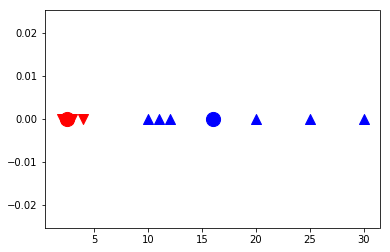

In [10]:
plot_cluster(model1, c0, c1)

In [11]:
def calc_new_centroid(model):
    c0_new = (X[model.labels_ == 0, 0].mean(), X[model.labels_ == 0, 1].mean())
    c1_new = (X[model.labels_ == 1, 0].mean(), X[model.labels_ == 1, 1].mean())
    return c0_new, c1_new

In [12]:
calc_new_centroid(model1)

((3.0, 0.0), (18.0, 0.0))

### K-means 2회차

In [13]:
# k-means 2회차
model1 = KMeans(n_clusters=2, init=np.array([[2.5,0],[16,0]]), n_init=1,
               max_iter=1, random_state=1).fit(X)
c0, c1 = model1.cluster_centers_
c0, c1

(array([3., 0.]), array([18.,  0.]))

In [14]:
model1.score(X)

-333.0

In [15]:
kmeans_df(model1, c0, c1)

,x0,x1,d0,d1,c
0,2.0,0.0,1.0,16.0,0.0
1,3.0,0.0,0.0,15.0,0.0
2,4.0,0.0,1.0,14.0,0.0
3,10.0,0.0,7.0,8.0,0.0
4,11.0,0.0,8.0,7.0,1.0
5,12.0,0.0,9.0,6.0,1.0
6,20.0,0.0,17.0,2.0,1.0
7,25.0,0.0,22.0,7.0,1.0
8,30.0,0.0,27.0,12.0,1.0


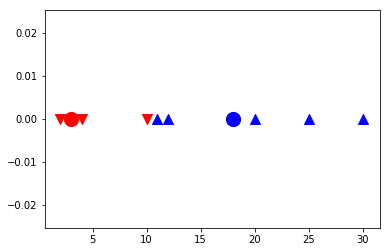

In [16]:
plot_cluster(model1, c0, c1)

In [17]:
calc_new_centroid(model1)

((4.75, 0.0), (19.6, 0.0))

### K-means 3회차

In [18]:
# k-means 3회차
model1 = KMeans(n_clusters=2, init=np.array([[3,0],[18,0]]), n_init=1,
               max_iter=1, random_state=1).fit(X)
c0, c1 = model1.cluster_centers_
c0, c1

(array([4.75, 0.  ]), array([19.6,  0. ]))

In [19]:
model1.score(X)

-267.85500000000013

In [20]:
kmeans_df(model1, c0, c1)

,x0,x1,d0,d1,c
0,2.0,0.0,2.75,17.6,0.0
1,3.0,0.0,1.75,16.6,0.0
2,4.0,0.0,0.75,15.6,0.0
3,10.0,0.0,5.25,9.6,0.0
4,11.0,0.0,6.25,8.6,0.0
5,12.0,0.0,7.25,7.6,0.0
6,20.0,0.0,15.25,0.4,1.0
7,25.0,0.0,20.25,5.4,1.0
8,30.0,0.0,25.25,10.4,1.0


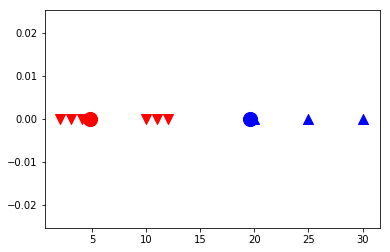

In [21]:
plot_cluster(model1, c0, c1)

In [22]:
calc_new_centroid(model1)

((7.0, 0.0), (25.0, 0.0))

### K-means 4회차

In [23]:
# k-means 4회차
model1 = KMeans(n_clusters=2, init=np.array([[4.75,0],[19.6,0]]), n_init=1,
               max_iter=1, random_state=1).fit(X)
c0, c1 = model1.cluster_centers_
c0, c1

(array([7., 0.]), array([25.,  0.]))

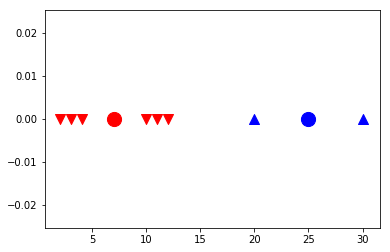

In [24]:
plot_cluster(model1, c0, c1)

### K-means 5회차

In [25]:
# k-means 5회차
model1 = KMeans(n_clusters=2, init=np.array([[7,0],[25,0]]), n_init=1,
               max_iter=1, random_state=1).fit(X)
c0, c1 = model1.cluster_centers_
c0, c1

(array([7., 0.]), array([25.,  0.]))

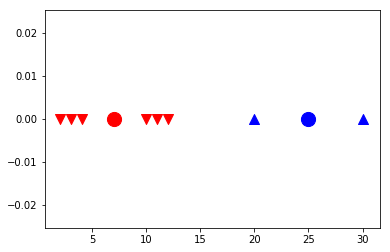

In [26]:
plot_cluster(model1, c0, c1)